In [1]:
#Import all the libraries
import numpy as np
import pandas as pd
import pickle
import time
import math, random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix

#serum_luminex

In [ ]:
# Train-Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_multiomics['serum_luminex'].values, 
                                                    data_multiomics['gestational_age'].values, 
                                                    test_size=0.25, random_state=0)

print(f"X_train shape: {X_train1.shape}, y_train shape: {y_train1.shape}", '\n', 
      f"X_test shape: {X_test1.shape}, y_test shape: {y_test1.shape}")



X_train shape: (51, 62), y_train shape: (51,) 
 X_test shape: (17, 62), y_test shape: (17,)


In [ ]:
# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

#Random forest regression

In [ ]:
# Parameters to tune
parameter_space = {
    'n_estimators': [10,50,100],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [10,20,30,40,50],
}
# create model
model = RandomForestRegressor(n_jobs=-1)
#Hyperparameter
reg_1 = GridSearchCV(
    model, 
    parameter_space, 
    cv = 3, 
    scoring = "neg_mean_absolute_error", 
    verbose = True
)
#Time perfomance
t0 = time.time()
#fitting model
reg_1.fit(X_train1, y_train1)
print("Best Parameters found: ", reg_1.best_params_)

train_pred1 = reg_1.predict(X_train1)   # Train predict
test_pred1 = reg_1.predict(X_test1)     # Test predict

print("\nFor Train:")
print("Root Mean Square Error is", mean_squared_error(y_train1,train_pred1)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_train1,train_pred1)) # Calculating MAE
print("r2 Score is", r2_score(y_train1,train_pred1)) # Calculating r2 Score

print("\nFor Test:")
print("Root Mean Square Error is", mean_squared_error(y_test1,test_pred1)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_test1,test_pred1)) # Calculating MAE
print("r2 Score is", r2_score(y_test1,test_pred1)) # Calculating r2 Score

t1 = time.time()
print("Total", t1 - t0)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Parameters found:  {'criterion': 'squared_error', 'max_depth': 40, 'n_estimators': 10}

For Train:
Root Mean Square Error is 5.305395292695802
Mean Absolute Error is 3.8498832866479926
r2 Score is 0.8270823381741849

For Test:
Root Mean Square Error is 11.519172816234741
Mean Absolute Error is 9.698039215686276
r2 Score is 0.30501652932307566
Total 26.900391817092896


#Support vector machine

In [ ]:
# Parameters to tune
parameter_space = {
    "kernel": ['linear','rbf','sigmoid'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

# create model
model = SVR()
#Hyperparameter
svm_1 = GridSearchCV(
    model, 
    parameter_space, 
    cv = 3,
    n_jobs=-1,
    scoring = "neg_mean_absolute_error", 
    verbose = True
)
svm_1.fit(X_train1, y_train1)
print("Best Parameters found: ", svm_1.best_params_)


train_pred2 = svm_1.predict(X_train1)   # Train predict
test_pred2 = svm_1.predict(X_test1)     # Test predict

print("\nFor Train:")
print("Root Mean Square Error is", mean_squared_error(y_train1,train_pred2)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_train1,train_pred2)) # Calculating MAE
print("r2 Score is", r2_score(y_train1,train_pred2)) # Calculating r2 Score


print("\nFor Test:")
print("Root Mean Square Error is", mean_squared_error(y_test1,test_pred2)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_test1,test_pred2)) # Calculating MAE
print("r2 Score is", r2_score(y_test1,test_pred2)) # Calculating r2 Score

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best Parameters found:  {'C': 10, 'kernel': 'linear'}

For Train:
Root Mean Square Error is 7.5568098345887345
Mean Absolute Error is 5.280113343094884
r2 Score is 0.6491828259488213

For Test:
Root Mean Square Error is 13.274313069474088
Mean Absolute Error is 10.663049732777344
r2 Score is 0.07709712244386058


#For metabolism

In [ ]:
#Create the train and test dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_multiomics['metabolomics'].values, 
                                                    data_multiomics['gestational_age'].values, 
                                                    test_size=0.2, random_state=0)

print(f"X_train shape: {X_train2.shape}, y_train shape: {y_train2.shape}", '\n',
      f"X_test shape: {X_test2.shape}, y_test shape: {y_test2.shape}")

X_train shape: (54, 3485), y_train shape: (54,) 
 X_test shape: (14, 3485), y_test shape: (14,)


#Random forest regression

In [ ]:
 #Random forest regressionscaler = MinMaxScaler()
scaler.fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
# Parameters to tune
parameter_space = {
    'n_estimators': [10,50,100],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [10,20,30,40,50],
}
# model
model = RandomForestRegressor(n_jobs=-1)
#Hypermarameter
reg_2 = GridSearchCV(
    model, 
    parameter_space, 
    cv = 3, 
    scoring = "neg_mean_absolute_error", 
    verbose = True
)
#fitting model
reg_2.fit(X_train2, y_train2)
print("Best Parameters found: ", reg_2.best_params_)

#predict
train_pred3 = reg_2.predict(X_train2)   # Train predict
test_pred3 = reg_2.predict(X_test2)     # Test predict

print("\nFor Train:")
print("Root Mean Square Error is", mean_squared_error(y_train2,train_pred3)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_train2,train_pred3)) # Calculating MAE
print("r2 Score is", r2_score(y_train2,train_pred3)) # Calculating r2 Score


print("\nFor Test:")
print("Root Mean Square Error is", mean_squared_error(y_test2,test_pred3)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_test2,test_pred3)) # Calculating MAE
print("r2 Score is", r2_score(y_test2,test_pred3)) # Calculating r2 Score

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Parameters found:  {'criterion': 'poisson', 'max_depth': 40, 'n_estimators': 10}

For Train:
Root Mean Square Error is 3.9455553991051002
Mean Absolute Error is 2.3555555555555556
r2 Score is 0.9056026351250187

For Test:
Root Mean Square Error is 8.75059181672058
Mean Absolute Error is 6.785714285714285
r2 Score is 0.6000458361092603


#Support vector machine

In [ ]:
# Parameters to tune
parameter_space = {
    "kernel": ['linear','rbf','sigmoid'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

# model
model = SVR()
#Hyperparameter
svm_2 = GridSearchCV(
    model, 
    parameter_space, 
    cv = 3,
    n_jobs=-1,
    scoring = "neg_mean_absolute_error", 
    verbose = True
)
#Fit the model
svm_2.fit(X_train2, y_train2)
print("Best Parameters found: ", svm_2.best_params_)

#Train the model
train_pred4 = svm_2.predict(X_train2)   # Train predict
test_pred4 = svm_2.predict(X_test2)     # Test predict

print("\nFor Train:")
print("Root Mean Square Error is", mean_squared_error(y_train2,train_pred4)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_train2,train_pred4)) # Calculating MAE
print("r2 Score is", r2_score(y_train2,train_pred4)) # Calculating r2 Score


print("\nFor Test:")
print("Root Mean Square Error is", mean_squared_error(y_test2,test_pred4)**(1/2)) # Calculating RMSE
print("Mean Absolute Error is", mean_absolute_error(y_test2,test_pred4)) # Calculating MAE
print("r2 Score is", r2_score(y_test2,test_pred4)) # Calculating r2 Score

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best Parameters found:  {'C': 1, 'kernel': 'linear'}

For Train:
Root Mean Square Error is 0.09918480980896806
Mean Absolute Error is 0.09874377957921945
r2 Score is 0.9999403467774933

For Test:
Root Mean Square Error is 8.29285882993747
Mean Absolute Error is 5.894130156455698
r2 Score is 0.6407937246006318


#Visualization

In [ ]:
from scipy.optimize import curve_fit

def objective(x, a, b):
    return a * x + b

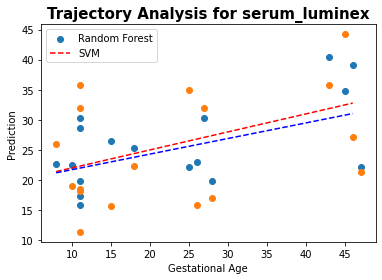

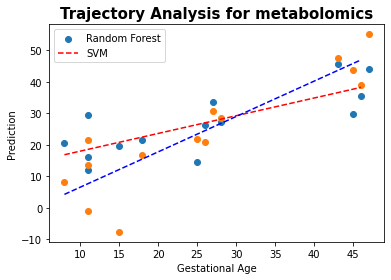

In [ ]:
plt.scatter(y_test1,test_pred1)
popt, _  = curve_fit(objective, xdata=y_test1, ydata=test_pred1)
a, b = popt
x_line = np.arange(min(y_test1), max(y_test1), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')

plt.scatter(y_test1,test_pred2)
popt, _  = curve_fit(objective, xdata=y_test1, ydata=test_pred2)
a, b = popt
x_line = np.arange(min(y_test1), max(y_test1), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='blue')

plt.xlabel('Gestational Age')
plt.ylabel('Prediction')
plt.title('Trajectory Analysis for serum_luminex', fontsize=15.0, fontweight='bold')
plt.legend(['Random Forest','SVM'])
plt.show()

plt.scatter(y_test2,test_pred3)
popt, _  = curve_fit(objective, xdata=y_test2, ydata=test_pred3)
a, b = popt
x_line = np.arange(min(y_test2), max(y_test2), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')

plt.scatter(y_test2,test_pred4)
popt, _  = curve_fit(objective, xdata=y_test2, ydata=test_pred4)
a, b = popt
x_line = np.arange(min(y_test2), max(y_test2), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='blue')

plt.xlabel('Gestational Age')
plt.ylabel('Prediction')
plt.title('Trajectory Analysis for metabolomics', fontsize=15.0, fontweight='bold')
plt.legend(['Random Forest','SVM'])
plt.show()

In [ ]:
col_1 = ['serum_luminex','metabolomics']
col_2 = [math.log10(mean_squared_error(y_test1,test_pred1)),math.log10(mean_squared_error(y_test2,test_pred3))]
col_3 = [math.log10(mean_squared_error(y_test1,test_pred2)),math.log10(mean_squared_error(y_test2,test_pred4))]
col_4 = [mean_absolute_error(y_test1,test_pred1),mean_absolute_error(y_test2,test_pred3)]
col_5 = [mean_absolute_error(y_test1,test_pred2),mean_absolute_error(y_test2,test_pred4)]
col_6 = [r2_score(y_test1,test_pred1),r2_score(y_test2,test_pred3)]
col_7 = [r2_score(y_test1,test_pred2),r2_score(y_test2,test_pred4)]

data_mse = pd.DataFrame(zip(col_1,col_2,col_3),columns=['Type','Random Forest','Support Vector Regression'])
data_mae = pd.DataFrame(zip(col_1,col_4,col_5),columns=['Type','Random Forest','Support Vector Regression'])
data_r2 = pd.DataFrame(zip(col_1,col_6,col_7),columns=['Type','Random Forest','Support Vector Regression'])


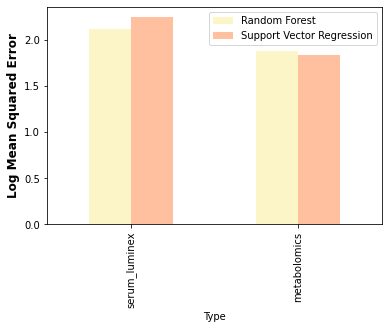

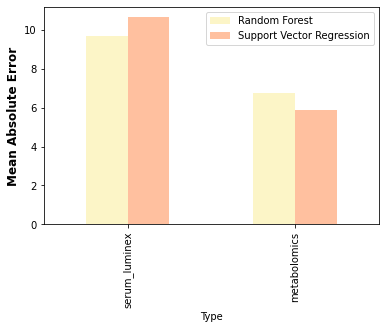

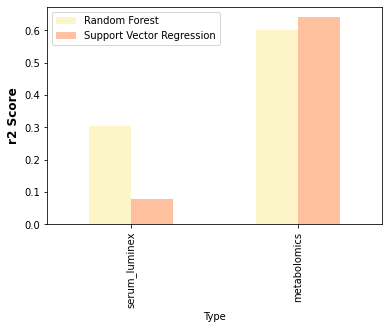

In [ ]:
data_mse.set_index('Type').plot(kind='bar', stacked=False, color=['#fcf5c7', '#ffc09f'])
plt.ylabel('Log Mean Squared Error', fontsize=12.0, fontweight='bold')
plt.show()
data_mae.set_index('Type').plot(kind='bar', stacked=False, color=['#fcf5c7', '#ffc09f'])
plt.ylabel('Mean Absolute Error', fontsize=12.0, fontweight='bold')
plt.show()
data_r2.set_index('Type').plot(kind='bar', stacked=False, color=['#fcf5c7', '#ffc09f'])
plt.ylabel('r2 Score', fontsize=12.0, fontweight='bold')
plt.show()

## Predicting the sex of the baby using neural networks

In [ ]:
#Import relative libraries
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

#For serum_luminex

In [ ]:
#Split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data_multiomics['serum_luminex'].values, 
                                                    data_multiomics['sex_bin'].values, 
                                                    test_size=0.1, random_state=0)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}", '\n',
      f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

y_train = to_categorical(y_train)

X_train shape: (61, 62), y_train shape: (61,) 
 X_test shape: (7, 62), y_test shape: (7,)


In [ ]:
#Create Simple NNS
import tensorflow as tf
input = Input(shape=(X_train.shape[1],), name='input')
    
# Encoder
from keras.layers import LSTM
x = Dense(32,activation='relu',name='layer_1')(input)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax', name='output')(x)

# Declaring model
model = Model(inputs = input , outputs = output , name='model')
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 62)]              0         
                                                                 
 layer_1 (Dense)             (None, 32)                2016      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 2,210
Trainable params: 2,146
Non-trainable params: 64
_________________________________________________________________


In [ ]:
#Execute the model but I applied a loop with 10 time repeats and each repeat has 100 epochs to have a more relaiable accuracy result.
from tensorflow import keras
repeats = 10
for i in range (repeats):
    epochs = 100
    batch_size = 32
  # I applied different learning rate and 0.001 has the better result and also different weight decay to learn smoother.

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.9 )
    #stop sooner than the epochs if 20 times repeat the same val_loss 
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            #save the model in file.h5
            "best_model.h5", save_best_only=True, monitor="val_loss"    ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=20, min_lr=0.001
        ),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
    ]
#define model
    model = Model(inputs = input , outputs = output , name='model')
    #compile the model
    model.compile(
        optimizer = optimizer,
        loss="binary_crossentropy",
        metrics=["Accuracy"],
    )
    #fiting the model but I applied the validation split rate 0.1.

    history = model.fit(
        x=X_train, 
        y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_split=0.1,
        verbose=1,
        shuffle=True
    )

Epoch 1/100
2/2 [==============================] - 1s 229ms/step - loss: 0.7813 - Accuracy: 0.5370 - val_loss: 14.5663 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 0.7595 - Accuracy: 0.5185 - val_loss: 10.6341 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 70ms/step - loss: 0.7247 - Accuracy: 0.5556 - val_loss: 8.9014 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6988 - Accuracy: 0.5556 - val_loss: 7.8828 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6830 - Accuracy: 0.5741 - val_loss: 7.2203 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 0.6574 - Accuracy: 0.6667 - val_loss: 6.7118 - val_Accuracy: 0.5714 - lr: 0.0010
Epoch 7/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6419 

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_train,y_train)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.1557 - Accuracy: 0.9016
Loss:  0.15567338466644287
Accuracy:  0.9016393423080444


**Prediction and scoring**

In [ ]:
pred=np.argmax(model.predict(X_test),axis=-1)

1/1 [==============================] - 0s 71ms/step


In [ ]:
# Function for Plotting the confusion matrix
def plot_confusion_matrix(conf_mat):        
    classes = ["Female","Male"]
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    data = df_cm.values.astype(str)
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=data, fmt = '', annot_kws={"size": 16})
    plt.show()
# Function for priniting the classification report
def report(x,y):                            
    acc = accuracy_score(x,y)
    cr = classification_report(x,y,zero_division=0)

    TP = TN = FP = FN = 0
    for i in range(len(x)):
        if x[i] == 1 and y[i] == 1:
            TP += 1
        elif x[i] == 0 and y[i] == 0:
            TN += 1
        elif x[i] == 0 and y[i] == 1:
            FP += 1
        else:
            FN += 1

    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    print("Accuracy: ", acc)
    print(f'\nTrue Positive Rate: {round(true_positive_rate,2)}')
    print(f'False Positive Rate: {round(false_positive_rate,2)}')
    print("\nClassification Report:\n", cr)
    
    cm = confusion_matrix(x,y,labels=[0, 1])
    plot_confusion_matrix(cm)


Accuracy:  0.7142857142857143

True Positive Rate: 1.0
False Positive Rate: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



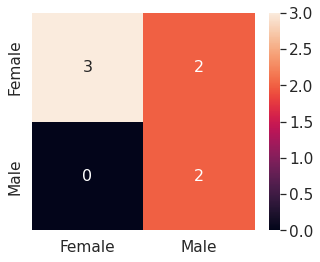

In [ ]:
report(y_test,pred)

**Apply different optimizers to compare which one has the better efect in our simple neural network**




In [ ]:
# apply different optimizer to find compare the results
acc_dict =[[],[]]
optimizer = [
    'Adadelta',
    'Adagrad',
    'Adam',
    'Adamax',
    'Ftrl',
    'Nadam',
    'RMSprop',
    'SGD',
 
]

repeats = 10
for optimizer in optimizer:
  for i in range(repeats):
      epochs = 100
      batch_size = 32

      callbacks = [
          keras.callbacks.ModelCheckpoint(
              "best_model.h5", save_best_only=True, monitor="val_loss"    ),
          keras.callbacks.ReduceLROnPlateau(
              monitor="val_loss", factor=0.5, patience=20, min_lr=0.001
          ),
          keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
      ]

      model = Model(inputs = input , outputs = output , name='model')
      model.compile(
          optimizer= optimizer,
          loss="binary_crossentropy",
          metrics=["Accuracy"],
      )

      history = model.fit(
          x=X_train, 
          y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=callbacks,
          validation_split=0.1,
          verbose=1,
          shuffle=True
      )
  loss, accuracy = model.evaluate(X_train,y_train)
  acc_dict[0].append(optimizer)
  acc_dict[1].append(accuracy)


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Epoch 10/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0610 - Accuracy: 0.9815 - val_loss: 0.0113 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 11/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0551 - Accuracy: 0.9815 - val_loss: 0.0094 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 12/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0936 - Accuracy: 0.9815 - val_loss: 0.0077 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 13/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0866 - Accuracy: 0.9815 - val_loss: 0.0099 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 14/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0673 - Accuracy: 0.9815 - val_loss: 0.0127 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 15/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0458 - Accuracy: 0.9815 - val_loss: 0.0146 - val_Accuracy: 1.0000 - lr: 0.0010
Epoch 16/

In [ ]:
def printArray(arr):
  for row in arr:
    for item in row:
      print("{:8.6}".format(item),end = '|')
    print("")
acc_dict[1] = [float(("%.2f" % e)) for e in acc_dict[1]]

printArray(acc_dict)

Adadel  |Adagra  |Adam    |Adamax  |Ftrl    |Nadam   |RMSpro  |SGD     |
    0.98|    0.98|    0.98|    0.98|    0.49|    0.49|    0.51|    0.51|


'Adadelta','Adagrad','Adam' and 'Adamax after the long trainig have the highest accuracy

**With LSTM**
Apply the memory in our structure

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
def LSTM_model():
 

    model = Sequential()    
    model.add(LSTM(units = 65, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units = 65, return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(units = 65))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [ ]:
model = LSTM_model()
model.summary() 
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001, weight_decay = 0.9 )
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x=X_train,  y=y_train,batch_size=32,epochs=100,validation_split=0.1,verbose=1)
loss, accuracy = model.evaluate(X_train,y_train)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 62, 65)            17420     
                                                                 
 dropout_30 (Dropout)        (None, 62, 65)            0         
                                                                 
 lstm_33 (LSTM)              (None, 62, 65)            34060     
                                                                 
 dropout_31 (Dropout)        (None, 62, 65)            0         
                                                                 
 lstm_34 (LSTM)              (None, 65)                34060     
                                                                 
 dropout_32 (Dropout)        (None, 65)                0         
                                                                 
 dense_10 (Dense)            (None, 2)               

Idea to applied the lstm came in my mind in the last minute therefore i didnt have enough time to optimized it to have a better accuracy but in the long time having the memory in our architecture is good to improve the time and learning.

#For metabolomics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_multiomics['metabolomics'].values, 
                                                    data_multiomics['sex_bin'].values, 
                                                    test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}", '\n',
      f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

y_train = to_categorical(y_train)

X_train shape: (54, 3485), y_train shape: (54,) 
 X_test shape: (14, 3485), y_test shape: (14,)


In [ ]:
#Neural network
input = Input(shape=(X_train.shape[1],), name='input')
    
# Encoder
x = Dense(32,activation='relu',name='layer_1')(input)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax', name='output')(x)

# Declaring model
model = Model(inputs = input , outputs = output , name='model')
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3485)]            0         
                                                                 
 layer_1 (Dense)             (None, 32)                111552    
                                                                 
 batch_normalization_14 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 111,746
Trainable params: 111,682
Non-trainable params: 64
_________________________________________________________________


In [ ]:
from tensorflow import keras
repeats = 10
for i in range (repeats):
    epochs = 100
    batch_size = 32
    optimizer = tf.keras.optimizers.Adam(learning_rate =0.001, weight_decay = 0.9 )
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "best_model.h5", save_best_only=True, monitor="val_loss"    ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=20, min_lr=0.001
        ),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
    ]

    model = Model(inputs = input , outputs = output , name='model')
    model.compile(
        optimizer = optimizer,
        loss="binary_crossentropy",
        metrics=["Accuracy"],
    )

    history = model.fit(
        x=X_train, 
        y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_split=0.1,
        verbose=1,
        shuffle=True
    )

Epoch 1/100
2/2 [==============================] - 2s 270ms/step - loss: 0.8217 - Accuracy: 0.5208 - val_loss: 1.1739 - val_Accuracy: 0.3333 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 64ms/step - loss: 0.6157 - Accuracy: 0.6250 - val_loss: 1.1475 - val_Accuracy: 0.1667 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 38ms/step - loss: 0.5150 - Accuracy: 0.6875 - val_loss: 1.2385 - val_Accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 0s 60ms/step - loss: 0.4505 - Accuracy: 0.7917 - val_loss: 1.2689 - val_Accuracy: 0.1667 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.4256 - Accuracy: 0.8542 - val_loss: 1.2421 - val_Accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.4075 - Accuracy: 0.8125 - val_loss: 1.1897 - val_Accuracy: 0.1667 - lr: 0.0010
Epoch 7/100
2/2 [==============================] - 0s 61ms/step - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

2/2 [==============================] - 0s 12ms/step - loss: 0.2897 - Accuracy: 0.9444
Loss:  0.289732962846756
Accuracy:  0.9444444179534912


1/1 [==============================] - 0s 108ms/step
Accuracy:  0.5714285714285714

True Positive Rate: 0.62
False Positive Rate: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.62      0.62      0.62         8

    accuracy                           0.57        14
   macro avg       0.56      0.56      0.56        14
weighted avg       0.57      0.57      0.57        14



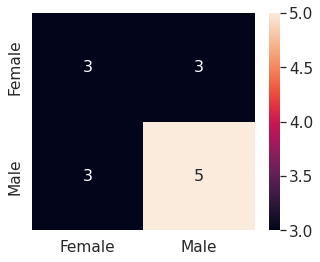

In [ ]:
pred=np.argmax(model.predict(X_test),axis=-1)
report(y_test, pred)

In [ ]:
# apply different optimizer to find compare the results
acc_dict =[[],[]]
optimizer = [
    'Adeadelta',
    'Adagrad',
    'Adam',
    'Adamax',
    'Ftrl',
    'Nadam',
    'RMSprop',
    'SDG'
] 

repeats = 10

for optimizer in optimizer:
  for i in range(repeats):
      epochs = 100
      batch_size = 32

      callbacks = [
          keras.callbacks.ModelCheckpoint(
              "best_model.h5", save_best_only=True, monitor="val_loss"    ),
          keras.callbacks.ReduceLROnPlateau(
              monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
          ),
          keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
      ]

      model = Model(inputs = input , outputs = output , name='model')
      model.compile(
          optimizer="adam",
          loss="binary_crossentropy",
          metrics=["Accuracy"],
      )

      history = model.fit(
          x=X_train, 
          y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=callbacks,
          validation_split=0.1,
          verbose=1,
          shuffle=True
      )
  loss, accuracy = model.evaluate(X_train,y_train)
  acc_dict[0].append(optimizer)
  acc_dict[1].append(accuracy)


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
2/2 [==============================] - 0s 45ms/step - loss: 2.8054e-04 - Accuracy: 1.0000 - val_loss: 34.4734 - val_Accuracy: 0.5000 - lr: 0.0010
Epoch 26/100
2/2 [==============================] - 0s 65ms/step - loss: 1.2092e-06 - Accuracy: 1.0000 - val_loss: 33.5037 - val_Accuracy: 0.3333 - lr: 0.0010
Epoch 27/100
2/2 [==============================] - 0s 48ms/step - loss: 3.1471e-05 - Accuracy: 1.0000 - val_loss: 32.6476 - val_Accuracy: 0.3333 - lr: 0.0010
Epoch 28/100
2/2 [==============================] - 0s 49ms/step - loss: 3.1571e-06 - Accuracy: 1.0000 - val_loss: 31.8735 - val_Accuracy: 0.3333 - lr: 0.0010
Epoch 29/100
2/2 [==============================] - 0s 51ms/step - loss: 1.8776e-06 - Accuracy: 1.0000 - val_loss: 31.1613 - val_Accuracy: 0.3333 - lr: 0.0010
Epoch 30/100
2/2 [==============================] - 0s 44ms/step - loss: 4.1087e-07 - Accuracy: 1.0000 - val_loss: 30.5545 - val_Accuracy: 0.3333 - lr:

In [ ]:
def printArray(arr):
  for row in arr:
    for item in row:
      print("{:8.6}".format(item),end = '|')
    print("")
acc_dict[1] = [float(("%.2f" % e)) for e in acc_dict[1]]

printArray(acc_dict)

Adeade  |Adagra  |Adam    |Adamax  |Ftrl    |Nadam   |RMSpro  |SDG     |
    0.57|    0.94|    0.93|    0.93|    0.48|    0.93|    0.93|    0.93|


**With LSTM**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
def LSTM_model():
 

    model = Sequential()    
    model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units = 60, return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(units = 60))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [ ]:
model = LSTM_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001, weight_decay = 0.9 )
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x=X_train,  y=y_train,batch_size=32,epochs=10,validation_split=0.1,verbose=1)
loss, accuracy = model.evaluate(X_train,y_train)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 3485, 60)          14880     
                                                                 
 dropout_36 (Dropout)        (None, 3485, 60)          0         
                                                                 
 lstm_39 (LSTM)              (None, 3485, 60)          29040     
                                                                 
 dropout_37 (Dropout)        (None, 3485, 60)          0         
                                                                 
 lstm_40 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_38 (Dropout)        (None, 60)                0         
                                                                 
 dense_12 (Dense)            (None, 2)               